In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt


# Regresion Lineal

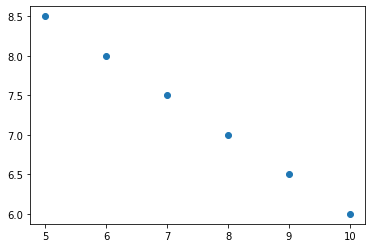

In [ ]:
car_price = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]
plt.scatter(car_price, units_sold)

In [ ]:
price_array = np.array(car_price).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)
price_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
prices  = torch.from_numpy(price_array).float().requires_grad_(True)
units  = torch.from_numpy(units_array).float()
prices

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True)

tensor(0.0167, grad_fn=<MseLossBackward>)


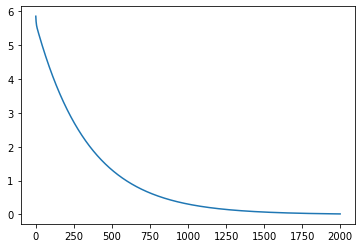

In [ ]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)
losses = []
iterations = 2000
for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations),losses)
  

In [ ]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7137]], grad_fn=<AddmmBackward>)

# Regresion logística

(Tema relacionado: Binary Cross Entropy/ Log Loss)

Es un mecanismo eficiente para calcular probabilidades. El resultado puede utilizarse tal cual o convertirlo a una categoría binaria (para clasificar).

Para una clasificacion binaria, nos apoyamos en una funcion matematica llamada **Sigmoide**. Si en caso la clasificacion tuviera mas parametro, hariamos uso de la funcion **Softmax**

Los problemas de categorizar se resuelven con regresion logística.

## Funcion Sigmoid

![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*sOtpVYq2Msjxz51XMn1QSA.png&f=1&nofb=1)

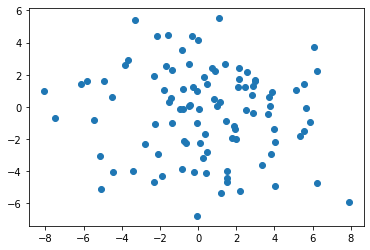

In [ ]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3

plt.scatter(data[:,0], data[:,1])

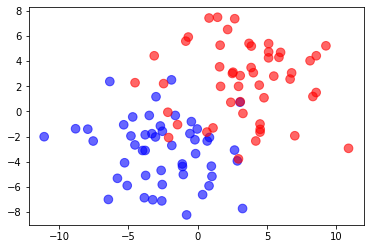

In [ ]:
data[:h, :] = data[:h, :] - 3*np.ones((h,dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h,dimen))
colors = ['blue', 'red']
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c = color, s=75, alpha=0.6)

In [ ]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True) 
y = torch.from_numpy(target).float()

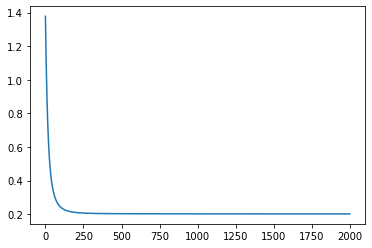

In [ ]:
model = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

losses = []
iterations = 2000
for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)

In [ ]:
# Prediciendo
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


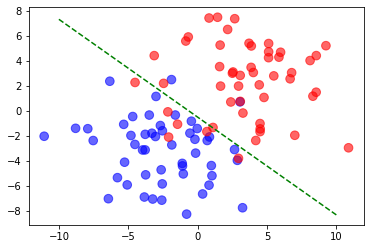

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')

# Neuronal Network

En la vida real la mayoría de problemas que vamos a resolver no serán lineales, afortunadamente tenemos varias herramientas que nos permiten modelarlo. Para esto necesitamos a las redes neuronales artificiales.

Con una capa oculta se agregan nodos y existirá una conexión entre ellos, estas pueden variar siendo de una o múltiples vías. También se pueden moderar de varias formas y cada una de estas capas puede variar dependiendo de la cantidad de capas ocultas que tengamos.

Cada neurona tiene una función de activación y nos va a permitir conectar las múltiples capas para realizar la transformación de lineal a red neuronal.

##Conceptos

**Perceptrón:** Neurona básica. Tendrá la entrada, salida y una función en medio. Normalmente trabaja con la función escalón de Heaviside. A esto se le puede agregar complejidad y funciones de activación como Sigmoid, Tanh, ReLUs y otras más.

**Tanh:** Se puede modelar como un caso específico del Sigmoid, nos ayuda porque esta escalado. La curva es diferente y puede saturarse en algunos casos.

**ReLU:** Evita el problema de vanishing gradient pero solo puede utilizarse en las hidden layers de una NN. Existen variantes para evitar algunos de los problemas más comunes como neuronas muertas.

# Usando modelo pre entrenado para reconocimiento de imagenes

In [ ]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [ ]:
inception = models.inception_v3(pretrained=True)
url = 'https://upload.wikimedia.org/wikipedia/commons/9/93/Golden_Retriever_Carlos_(10581910556).jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

Output hidden; open in https://colab.research.google.com to view.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


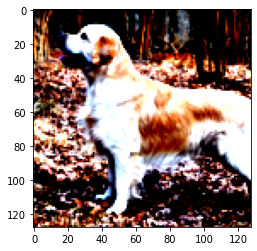

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
inception.eval()

In [ ]:
out = inception(batch)

In [ ]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 76.32284545898438)

In [ ]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 76.32284545898438
Brittany spaniel 21.766080856323242
borzoi, Russian wolfhound 1.360917091369629
English setter 0.22019939124584198
cocker spaniel, English cocker spaniel, cocker 0.20834305882453918


# Trabajando un dataset

In [ ]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [ ]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
len(dataset)

50000

In [ ]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE4D39E0828>, 9, 'truck')

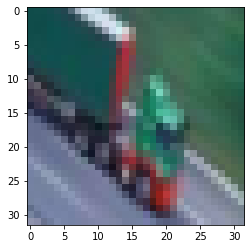

In [ ]:
plt.imshow(img)

In [ ]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE4D39E0828>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [ ]:
# Desde este momento todo el dataset lo convertira a tensor.
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
img, label = dataset[50]
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

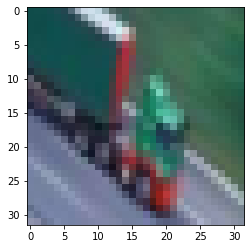

In [ ]:
plt.imshow(img.permute(1, 2, 0))

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)
imgs.view(3, -1).std(dim=1)
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

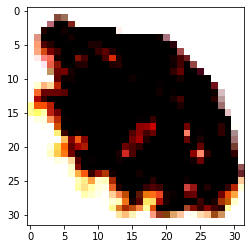

In [ ]:
img_transformed, label = dataset[125]
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]

# Construyendo un modelo

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [3]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car
deer
ship
car


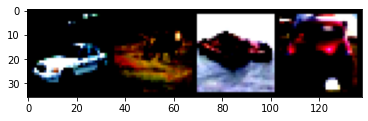

In [4]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [5]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [6]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [7]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

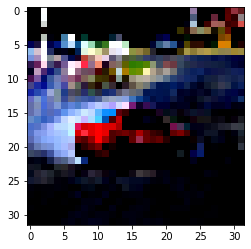

In [8]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [12]:
out = model(img.view(-1).unsqueeze(0))
out
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])


-> car  model: car


# Implementando un clasificador totalmente conectado

In [ ]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

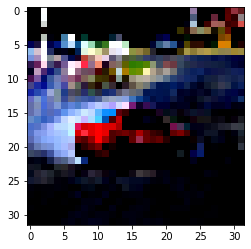

In [ ]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
print(out)
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

tensor([[-0.8872, -0.5307]], grad_fn=<LogSoftmaxBackward>)
-> car  model: cat


In [ ]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Con solo 5 iteraciones se tardo mas que la siguiente variante
n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_function(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.079645
Epoch: 1, Loss: 0.898328
Epoch: 2, Loss: 0.033597
Epoch: 3, Loss: 2.123086
Epoch: 4, Loss: 3.488053


In [ ]:
# Utilizando un batch, hace que el proceso sea mas rapido
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.579665
Epoch: 1, Loss: 0.276679
Epoch: 2, Loss: 0.283800
Epoch: 3, Loss: 0.453666
Epoch: 4, Loss: 0.240552
Epoch: 5, Loss: 0.193078
Epoch: 6, Loss: 0.253140
Epoch: 7, Loss: 0.405446
Epoch: 8, Loss: 0.182359
Epoch: 9, Loss: 0.310222
Epoch: 10, Loss: 0.253328
Epoch: 11, Loss: 0.222465
Epoch: 12, Loss: 0.035033
Epoch: 13, Loss: 0.152769
Epoch: 14, Loss: 0.186168
Epoch: 15, Loss: 0.065939
Epoch: 16, Loss: 0.065597
Epoch: 17, Loss: 0.081390
Epoch: 18, Loss: 0.187011
Epoch: 19, Loss: 0.030066
Epoch: 20, Loss: 0.081095
Epoch: 21, Loss: 0.154317
Epoch: 22, Loss: 0.053748
Epoch: 23, Loss: 0.031712
Epoch: 24, Loss: 0.054866
Epoch: 25, Loss: 0.023348
Epoch: 26, Loss: 0.016873
Epoch: 27, Loss: 0.038516
Epoch: 28, Loss: 0.046967
Epoch: 29, Loss: 0.028215
Epoch: 30, Loss: 0.030273
Epoch: 31, Loss: 0.008764
Epoch: 32, Loss: 0.008277
Epoch: 33, Loss: 0.018679
Epoch: 34, Loss: 0.007983
Epoch: 35, Loss: 0.024759
Epoch: 36, Loss: 0.022961
Epoch: 37, Loss: 0.013506
Epoch: 38, Loss: 0.032

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


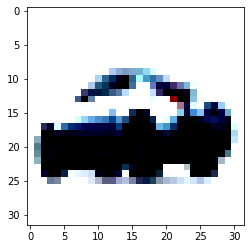

In [ ]:
# Probando el modelo utiliznado el dataset de validacion
img, label = validation_set[800]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras, limitaciones y conclusiones

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.337831
Epoch: 1, Loss: 0.330116
Epoch: 2, Loss: 0.550028
Epoch: 3, Loss: 0.701916
Epoch: 4, Loss: 0.540161
Epoch: 5, Loss: 0.305758
Epoch: 6, Loss: 0.260257
Epoch: 7, Loss: 0.345960
Epoch: 8, Loss: 0.131402
Epoch: 9, Loss: 0.408912
Epoch: 10, Loss: 0.385890
Epoch: 11, Loss: 0.387101
Epoch: 12, Loss: 0.196822
Epoch: 13, Loss: 0.104679
Epoch: 14, Loss: 0.406318
Epoch: 15, Loss: 0.098912
Epoch: 16, Loss: 0.226068
Epoch: 17, Loss: 0.145410
Epoch: 18, Loss: 0.070109
Epoch: 19, Loss: 0.177327
Epoch: 20, Loss: 0.300506
Epoch: 21, Loss: 0.069799
Epoch: 22, Loss: 0.247977
Epoch: 23, Loss: 0.091511
Epoch: 24, Loss: 0.026984
Epoch: 25, Loss: 0.060752
Epoch: 26, Loss: 0.133155
Epoch: 27, Loss: 0.022584
Epoch: 28, Loss: 0.093672
Epoch: 29, Loss: 0.081871
Epoch: 30, Loss: 0.007572
Epoch: 31, Loss: 0.043461
Epoch: 32, Loss: 0.011185
Epoch: 33, Loss: 0.279513
Epoch: 34, Loss: 0.024779
Epoch: 35, Loss: 0.002259
Epoch: 36, Loss: 0.021326
Epoch: 37, Loss: 0.003473
Epoch: 38, Loss: 0.009

In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.863000


In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct:  car  model: cat


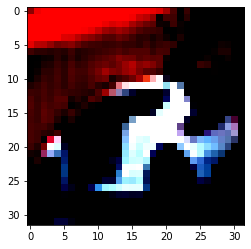

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


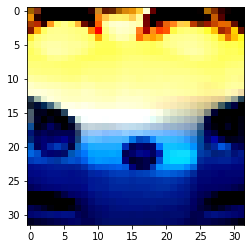

In [ ]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

In [ ]:
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))

tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1],
        [2],
        [3],
        [4]])
